In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster
from sklearn import decomposition

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [57]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Personal Projects/Facebook Seller Live.csv'
df = pd.read_csv(datafile) #creates a dataframe
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


**Exploratory Data Analysis**

In [58]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [60]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Drop missing values

In [61]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [62]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [63]:
#drop unneeded categorial variables
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [64]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
5,photo,217,6,0,211,5,1,0,0,0
6,video,503,614,72,418,70,10,2,0,3
7,video,295,453,53,260,32,1,1,0,1
8,photo,203,1,0,198,5,0,0,0,0
9,photo,170,9,1,167,3,0,0,0,0


**Visualize the Data**

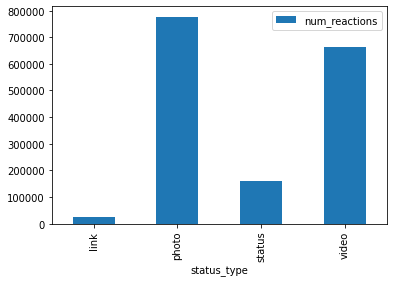

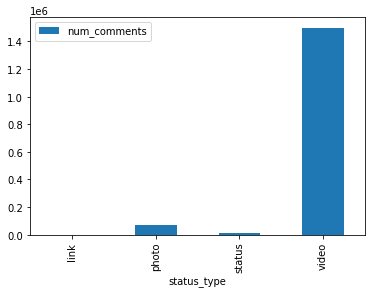

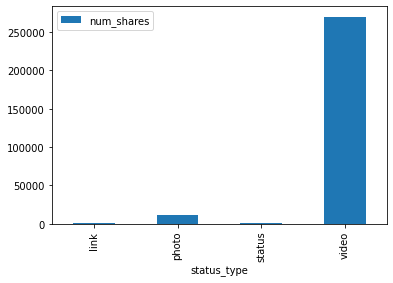

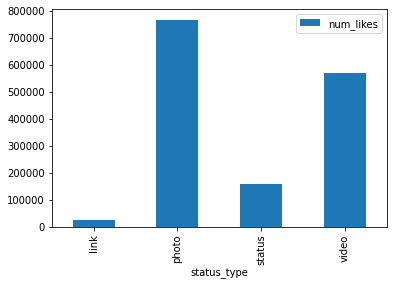

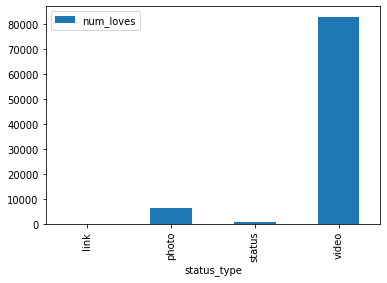

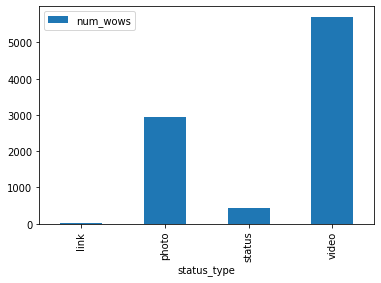

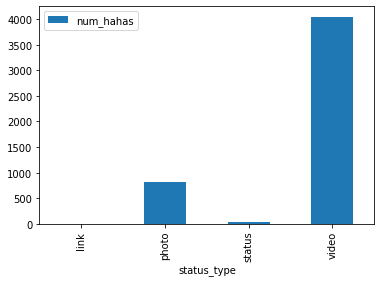

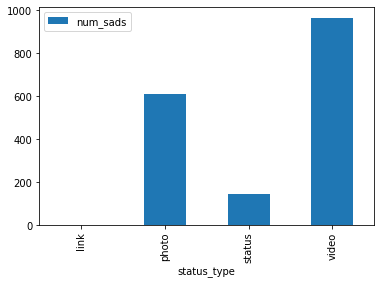

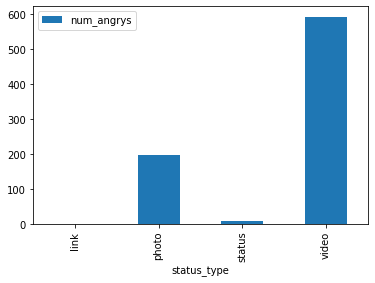

In [65]:
#barplot
df.groupby('status_type').sum().plot(kind='bar', y='num_reactions')
df.groupby('status_type').sum().plot(kind='bar', y='num_comments')
df.groupby('status_type').sum().plot(kind='bar', y='num_shares')
df.groupby('status_type').sum().plot(kind='bar', y='num_likes')
df.groupby('status_type').sum().plot(kind='bar', y='num_loves')
df.groupby('status_type').sum().plot(kind='bar', y='num_wows')
df.groupby('status_type').sum().plot(kind='bar', y='num_hahas')
df.groupby('status_type').sum().plot(kind='bar', y='num_sads')
df.groupby('status_type').sum().plot(kind='bar', y='num_angrys')

**Encode Categorical Variables**

In [66]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['status_type']= le.fit_transform(df['status_type']) 

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [67]:
df.to_csv('/gdrive/My Drive/Data Projects/Marketing Analytics/Personal Projects/Encoding.csv')

*0 = link,
1 = photo,
2 = status,
3 = video*

Standardize the columns

In [68]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)

In [69]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,z_status_type,z_num_reactions,z_num_comments,z_num_shares,z_num_likes,z_num_loves,z_num_wows,z_num_hahas,z_num_sads,z_num_angrys
0,3,529,512,262,432,92,3,1,1,0,1.374190,0.646058,0.323327,1.686759,0.482692,1.983126,0.196182,0.076708,0.473537,-0.155737
1,1,150,0,0,150,0,0,0,0,0,-0.748053,-0.173179,-0.252188,-0.304123,-0.144710,-0.318432,-0.147869,-0.175997,-0.152576,-0.155737
2,3,227,236,57,204,21,1,1,0,0,1.374190,-0.006738,0.013088,0.129008,-0.024569,0.206924,-0.033185,0.076708,-0.152576,-0.155737
3,1,111,0,0,111,0,0,0,0,0,-0.748053,-0.257481,-0.252188,-0.304123,-0.231478,-0.318432,-0.147869,-0.175997,-0.152576,-0.155737
4,1,213,0,0,204,9,0,0,0,0,-0.748053,-0.037000,-0.252188,-0.304123,-0.024569,-0.093279,-0.147869,-0.175997,-0.152576,-0.155737


**Perform K-means Clustering**

In [70]:
model = cluster.KMeans(n_clusters=4, random_state=10)
model.fit(df[['z_status_type', 'z_num_reactions', 'z_num_comments', 'z_num_shares', 'z_num_likes', 'z_num_loves', 'z_num_wows', 'z_num_hahas', 'z_num_sads', 'z_num_angrys']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [71]:
df['cluster'] = model.labels_
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,z_status_type,z_num_reactions,z_num_comments,z_num_shares,z_num_likes,z_num_loves,z_num_wows,z_num_hahas,z_num_sads,z_num_angrys,cluster
0,3,529,512,262,432,92,3,1,1,0,1.374190,0.646058,0.323327,1.686759,0.482692,1.983126,0.196182,0.076708,0.473537,-0.155737,0
1,1,150,0,0,150,0,0,0,0,0,-0.748053,-0.173179,-0.252188,-0.304123,-0.144710,-0.318432,-0.147869,-0.175997,-0.152576,-0.155737,1
2,3,227,236,57,204,21,1,1,0,0,1.374190,-0.006738,0.013088,0.129008,-0.024569,0.206924,-0.033185,0.076708,-0.152576,-0.155737,0
3,1,111,0,0,111,0,0,0,0,0,-0.748053,-0.257481,-0.252188,-0.304123,-0.231478,-0.318432,-0.147869,-0.175997,-0.152576,-0.155737,1
4,1,213,0,0,204,9,0,0,0,0,-0.748053,-0.037000,-0.252188,-0.304123,-0.024569,-0.093279,-0.147869,-0.175997,-0.152576,-0.155737,1


**Perform PCA**

In [72]:
#define a PCA object with n_components set to 2
pca = decomposition.PCA(n_components=2)

#use this PCA oject to transform the standardized data and store the transformed dimensions in pc1 and pc2
df['pc1'], df['pc2'] = zip(*pca.fit_transform(df[['z_status_type', 'z_num_reactions', 'z_num_comments', 'z_num_shares', 'z_num_likes', 'z_num_loves', 'z_num_wows', 'z_num_hahas', 'z_num_sads', 'z_num_angrys']]))

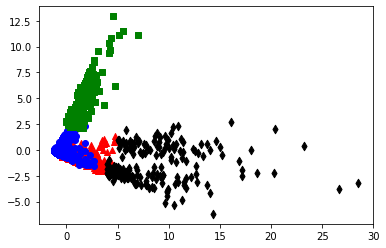

In [73]:
#plot the clusters in the reduced deimnsionality space 
colors = ['r', 'b', 'k', 'g'] 
markers = ['^', 'o', 'd', 's']

for c in df['cluster'].unique():
  d = df[df['cluster'] == c]
  plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])

In [74]:
#look at the means of the variables of each cluster to see what the cluster is capturing
for cluster in df['cluster'].unique():
    print("Cluster: " + str(cluster))
    for col in ['status_type',	'num_reactions',	'num_comments',	'num_shares',	'num_likes',	'num_loves',	'num_wows',	'num_hahas',	'num_sads',	'num_angrys']:
        print(col + ": {:.2f}".format(df.loc[df['cluster'] == cluster, col].mean()))

Cluster: 0
status_type: 2.99
num_reactions: 168.38
num_comments: 379.28
num_shares: 74.77
num_likes: 143.01
num_loves: 23.42
num_wows: 0.64
num_hahas: 0.90
num_sads: 0.26
num_angrys: 0.15
Cluster: 1
status_type: 1.05
num_reactions: 92.00
num_comments: 11.73
num_shares: 1.73
num_likes: 89.95
num_loves: 1.24
num_wows: 0.53
num_hahas: 0.14
num_sads: 0.11
num_angrys: 0.02
Cluster: 2
status_type: 2.87
num_reactions: 922.15
num_comments: 3540.53
num_shares: 564.56
num_likes: 713.44
num_loves: 169.47
num_wows: 22.31
num_hahas: 11.68
num_sads: 3.32
num_angrys: 1.94
Cluster: 3
status_type: 1.55
num_reactions: 1815.95
num_comments: 60.69
num_shares: 11.53
num_likes: 1810.22
num_loves: 3.08
num_wows: 2.42
num_hahas: 0.20
num_sads: 0.03
num_angrys: 0.01


One thing to note is how imbalanced the data is in regards to status_type. Photos and video really dominates. 

In [75]:
df.to_csv('/gdrive/My Drive/Data Projects/Marketing Analytics/Personal Projects/Facebook Clusters.csv')

**Analyze Cluster Composition in Excel**

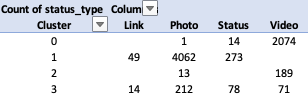

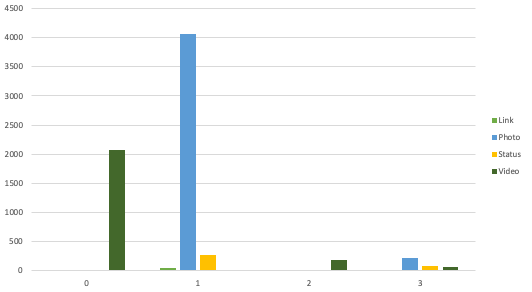

PivotTable of the count of status_type per cluster. This continues to show how imbalanced the data is, with much more photo and videos.



*  Cluster 0 - video dominated, no links
*  Cluster 1 - photo dominated, no videos
* Cluster 2 - Video is majority but significantly smaller than cluster 0, no links or statuses. Status_type appears less important for this cluster. 
* Cluster 3 - Photo is majority, but does include all four status_type. Like cluster 2, status_type appears less important for this cluster.



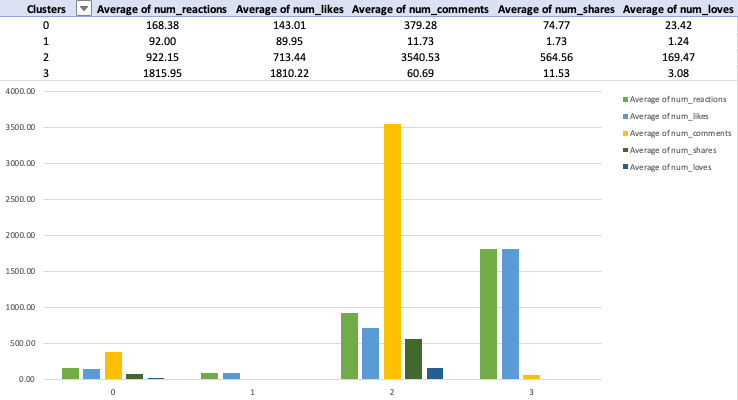

**Cluster Final Conclusions:**

Clusters appear to be arranged as follows: 




*   Cluster 0 - videos
*   Cluster 1 - photos, with no shares, comments, or loves, and minimal reactions and likes
* Cluster 2 - seems less relevant the status type, and more to do with large number of comments on the post
* Cluster 3 - again, seems less relevant the status type, and more to do with posts that have similar average number of likes and reactions

---





